# Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Establishing Working Directory

In [2]:
os.getcwd()
os.chdir("C:\\Users\\bfran\\Ironhack\\Week 5\\Week 5 Labs\\lab-eda-bivariate")

# Loading and Exploring Dataframe df

In [3]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv', encoding='unicode_escape')
df
# Tells us that our data has 2.4 million rows and 9 columns, also gives head and tail. 

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Menâs Motorcycle Motorbike Biker Trousers Ke...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
# Gives us the data type of each column
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [5]:
df.select_dtypes("number").nunique().sort_values(ascending=False)
# Shows that price and number of reviews are continuous variables...
# suggests that stars and bought in last month might be discreet or categorical

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [6]:
df['boughtInLastMonth'].value_counts()
# shows that this variable is a discreet variable

boughtInLastMonth
0        2230204
50         75790
100        58578
200        24200
300        13650
400         8836
1000        8692
500         6110
600         4320
700         3121
2000        2550
800         2456
900         2070
3000        1130
4000         634
5000         430
10000        259
6000         223
7000         150
8000         116
9000          97
20000         27
50000          3
30000          3
40000          2
Name: count, dtype: int64

In [7]:
df['stars'].value_counts()
# shows that stars variable is also discreet

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

In [8]:
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)
# No missings at all, lovely!

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

# Cleaning Data For Analysis

In [9]:
# Drops useless uid and asin columns
df.drop("uid", inplace=True, axis=1)
df.drop("asin", inplace=True, axis=1)

In [10]:
# Separates df into categorical and numeric subsets
cat_cols = ['title','isBestSeller', 'category']
num_cols = ['stars','reviews','price','boughtInLastMonth']

df_cat = df[cat_cols]
df_num = df[num_cols]

df_num

,stars,reviews,price,boughtInLastMonth
0,4.7,15308,21.99,0
1,4.7,98099,23.99,0
2,4.7,15308,21.99,0
3,4.7,7205,31.99,0
4,4.6,1881,17.99,0
...,...,...,...,...
2443646,0.0,0,22.34,0
2443647,0.0,0,97.99,0
2443648,0.0,0,52.99,0
2443649,4.3,404,79.99,0


# Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [11]:
# Generating a crosstab for 'MSZoning' and 'SaleCondition'
crosstable = pd.crosstab(df['category'], df['isBestSeller'])

crosstable

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [12]:
crosstable.sort_values(by = True, ascending = False).head(20)

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
Beauty,19010,302
Pet Supplies,9152,285
Arts & Crafts,9319,230
Women,17559,213


There are many categories where being a bestseller is more prevalent. For example, in grocery there are 556 bestselling items, likely because there is such a wide variety of grocery products - there could be bestsellers of every kind of fruit, every kind of garlic (fresh, minced, powder, salt, etc.), and every kind of milk. There are a 106 bestsellers in gardening - there could be best selling gloves for men and for women, hoes, hoses, spades, etc. It's not surprising that some categories have many, many topsellers. 

In [13]:
from scipy.stats import chi2_contingency

# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstable)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

The p-value being returned is so small that it is registering as zero. It seems then that best-seller distribution is definitely dependent on category. 

In [14]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstable, method="cramer")

0.1222829439760564

The Cramér's V value of 0.122 suggests a weak association between the two variables. Though statistically significant, the strength of this relationship is not very strong in practical terms.

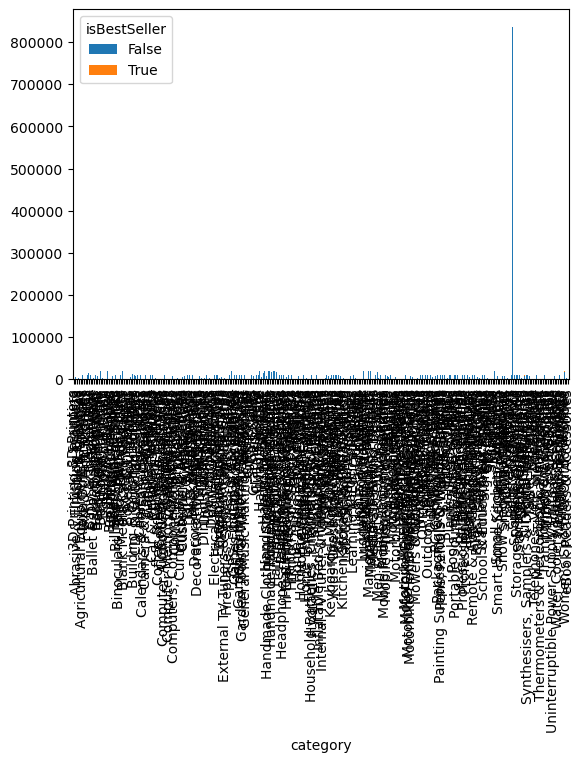

In [15]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstable.plot(kind="bar", stacked=True);

That table is entirely unhelpful because it is entirely illegible. Let's just plot the first 20 and then the top 20 instead. 

<Axes: xlabel='category'>

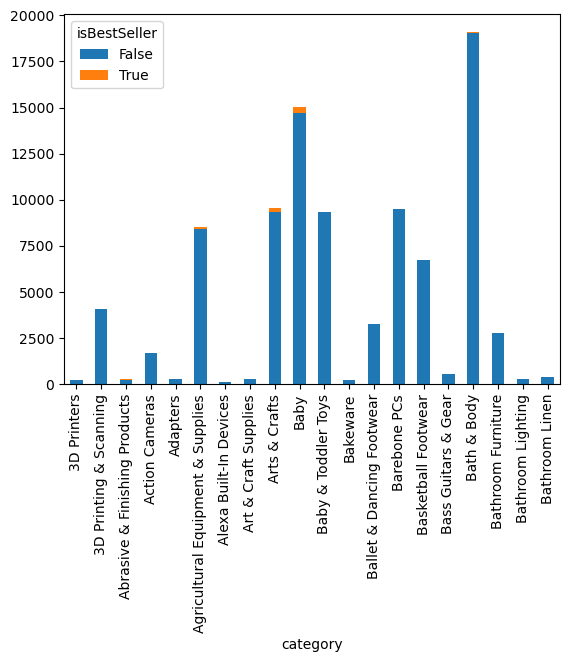

In [16]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstable.head(20).plot(kind="bar", stacked=True)

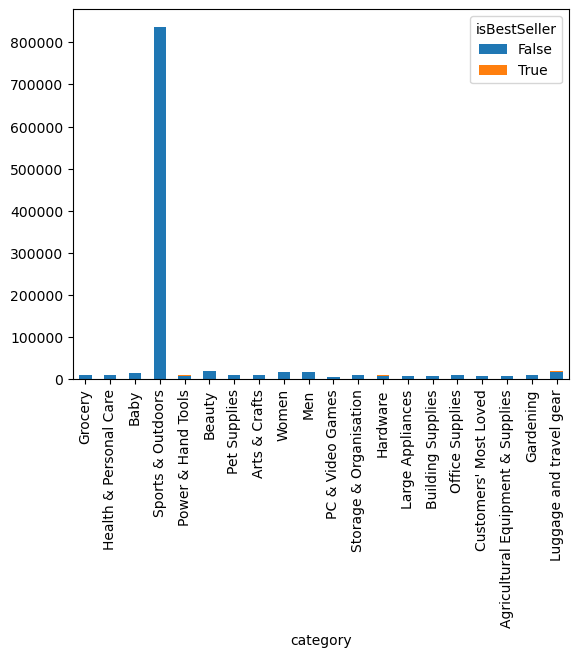

In [17]:
crosstable.sort_values(by = True, ascending = False).head(20).plot(kind="bar", stacked=True);

Finally, I'll make two more plots. The first will show the categories with the highest bestseller to not bestseller ratio, and then the ones with the lowest. 

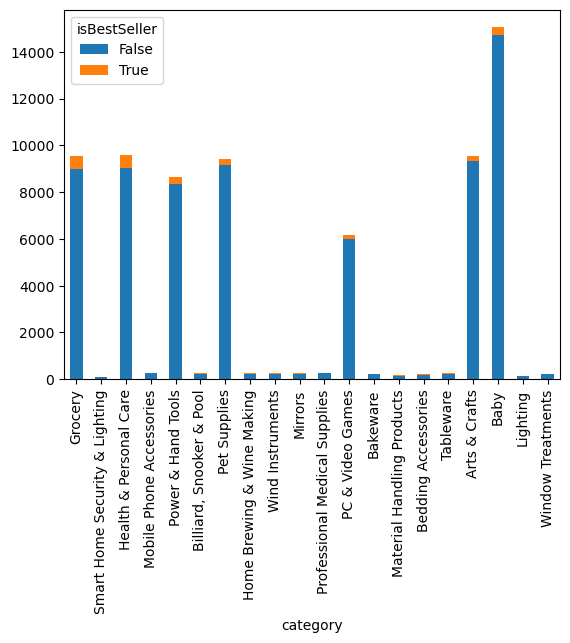

In [18]:
# Create ratio
crosstable['Ratio'] = crosstable[True]/crosstable[False]

crosstable.sort_values(by = 'Ratio', ascending = False).drop(columns='Ratio').head(20).plot(kind="bar", stacked=True);

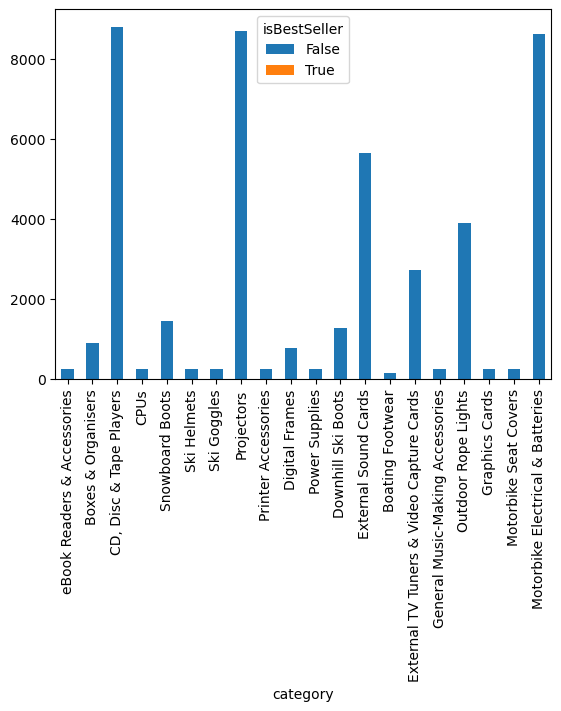

In [19]:
crosstable.sort_values(by = 'Ratio', ascending = True).drop(columns='Ratio').head(20).plot(kind="bar", stacked=True);

While in many of the categories with the highest proportions of bestsellers we can see orange caps in our chart, in those categories with the lowest proportion, we cannot see the orange caps at all. 

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [20]:
# Defines function for returning outliers
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [21]:
# runs function to identify price outliers, store results in object 'outliers'
outliers = tukeys_test_outliers(df['price'])

In [22]:
# saves as a subset all rows in df['price] that are found in the outliers object
df_outliers = df['price'].isin(outliers)

In [23]:
# saves as a separate subset all rows in df that are not found in df_outliers
df_no_outliers = df[~df_outliers]

In [24]:
top_20 = df_no_outliers['category'].value_counts().nlargest(20).index

df_top_20 = df_no_outliers[df_no_outliers['category'].isin(top_20)]

C:\Users\bfran\AppData\Local\Temp\ipykernel_8692\3556866080.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_20, x='price', y='category', palette="Set3")


<Axes: xlabel='price', ylabel='category'>

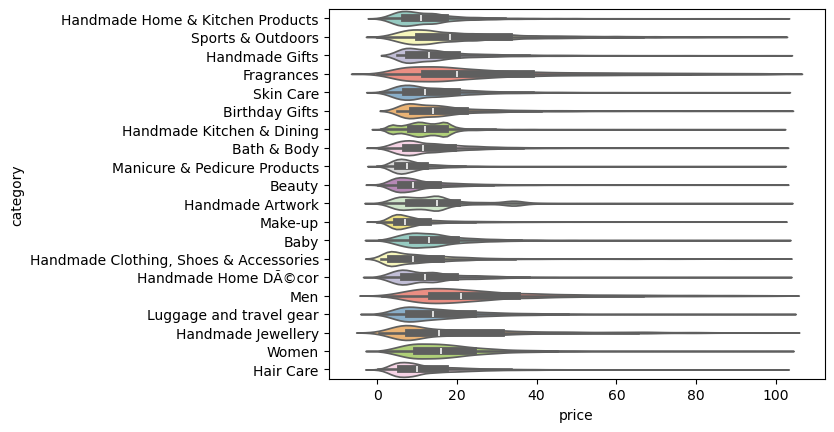

In [25]:
# Plotting a violin plot to visualize the distribution of 'price' for 'category', using the "coolwarm" color palette
sns.violinplot(data=df_top_20, x='price', y='category', palette="Set3")

In [26]:
# Group df by category, get the median price of each category, and store those in object median_prices. 
median_prices = df_no_outliers.groupby('category')['price'].median()

# Get the id of the category with the highest median value. 
median_prices.idxmax()

'Desktop PCs'

Based on the chart above, Sports & Outdoors, Fragrances, and Men seem to be the categories with the highest prices. However, since these are just the categories with the most sales, that may not be accurate. By collecting the median values of all categories and printing the id of the category with the highest median, we see that Desktop PCs have the highest median value. 

In [27]:
top_10 = df_no_outliers['category'].value_counts().nlargest(10).index

df_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10)]

mean_prices = df_top_10.groupby('category')['price'].mean().reset_index()

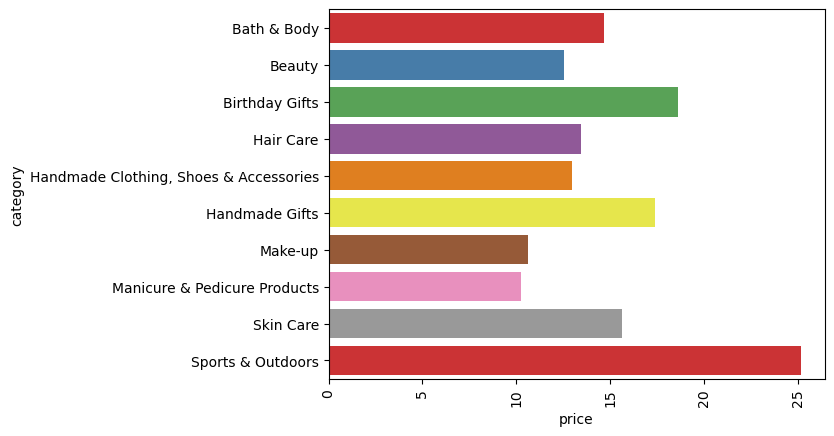

In [28]:
# Plotting a bar plot to visualize the average 'price' for the top ten item categories, using the "Set1" palette
sns.barplot(data = mean_prices,x = mean_prices['price'], hue='category', y = 'category', palette="Set1", legend = False);
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [29]:
# Group df by category, get the mean price of each category, and store those in object median_prices. 
mean_prices = df_no_outliers.groupby('category')['price'].mean()

# Get the id of the category with the highest mean value. 
mean_prices.idxmax()

'Motherboards'

According to the chart above, the most popular category with the highest mean value is Sports & Outdoors by far. However, when looking at the mean prices of for each category, Motherboards actually has the highest average price per item.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

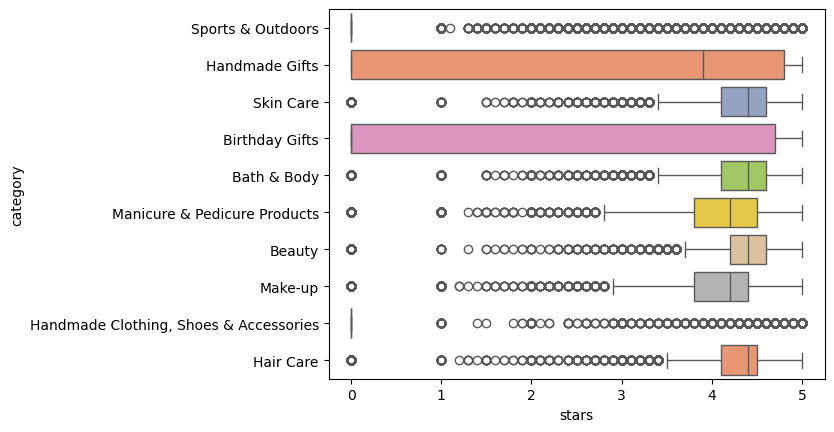

In [30]:
# Plotting a box plot to visualize the spread and outliers of 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.boxplot(data = df_top_10, x='stars', y='category', hue = 'category', palette="Set2");

This visualization is being somewhat hampered by the fact that products without reviews are being included. However, information in it is still useful. First off, we see that for Sports & Outdoors and for Handmade Clothing, Shoes, & Accessories, such a large majority of products **don't** have any ratings that all products that *do* are considered outliers. We also see that both of the Gifts categories have interquartile ranges that *include* items with no ratings, which is just interesting. 

In order to get more information out of this, I need to filter out the items without ratings. 

In [31]:
df_only_stars = df_no_outliers[df_no_outliers['stars']!=0]

top_10_stars = df_only_stars['category'].value_counts().nlargest(10).index

df_top_10_stars = df_only_stars[df_only_stars['category'].isin(top_10)]

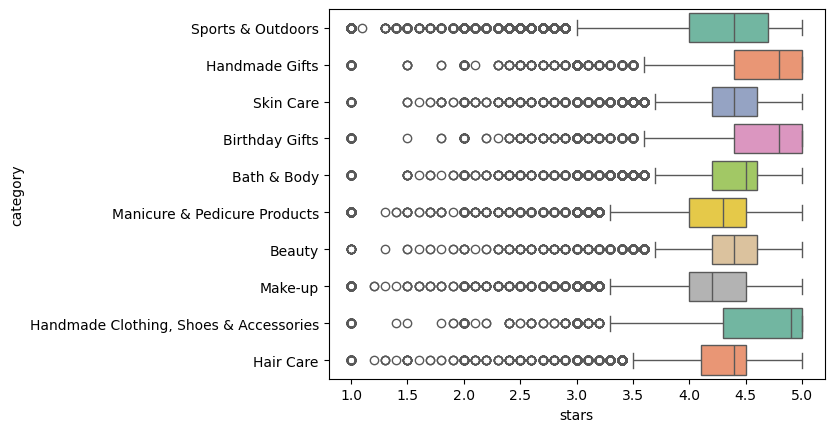

In [32]:
# Plotting a box plot to visualize the spread and outliers of 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.boxplot(data = df_top_10_stars, x='stars', y='category', hue = 'category', palette="Set2");

This chart is more legible, and more informative. The highest value any category receives is five stars, since five stars is the highest rating a product can receive. Each of these categories only has outliers that are rated less than 3 stars. Handmade Gifts, Birthday Gifts and Homemade Clothing, Shoes, and Accessories are all categories with such overwhelmingly positive reviews that 5 star ratings are *included* in their 3rd quartile of ratings. 

For the gifts categories, this makes sense, because people who buy gifts and then review them are more likely to feel positively about the products they buy because they don't have to use them - they gift them to someone else, who uses them. And let's be real, we have all pretended to like gifts more than we do simply because we don't want to offend the gift giver. 

We also see that the median star rating for all of these categories floats right around 4.5 stars, suggesting that these categories not only have the most sales, but that the items sold in thoes categories tend to consistently please their purchasers. 

# Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 


In [35]:
# Calculate correlation coefficient between price and stars
corr = df['price'].corr(df['stars'])
corr

-0.12490673262148641

So there is a slightly negative correlation between price and stars, meaning that as price for an item goes up, the number of stars that item has typically goes down. 

In [38]:
import scipy.stats as st

corr, p_value = st.pearsonr(df['price'],df['stars'])

print("Pearson correlation coefficient: ", corr, 'p-value:', p_value)

Pearson correlation coefficient:  -0.12490673262148638 p-value: 0.0


By running a pearsonr correlation using the scipy.stats package, while getting the exact same correlation value, I determined that the p-value is less than 0.05, meaning that the results are, indeed, significant. 

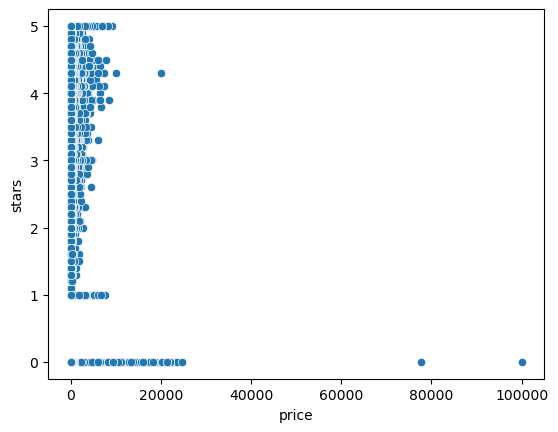

In [42]:
# Plot a scatter plot to visualize the relationship between price and stars. 
sns.scatterplot(data = df, x = df['price'], y = df['stars']);

This scatter plot is heavily impacted by the outliers. So, I'll run it again, this time removing said outliers. 

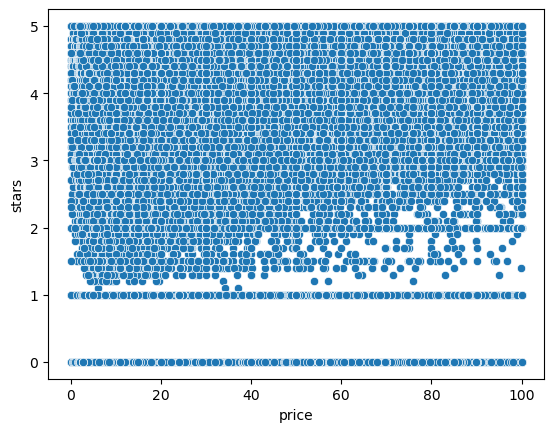

In [46]:
# Plot a scatter plot to visualize the relationship between price and stars. 
sns.scatterplot(data = df_no_outliers, x = 'price', y = 'stars');

This scatterplot, while not influenced or distorted by outlying prices, is equally uninformative. I can observe that there is actually a slight rise in price as average star rating inreases from 1 to 2.5. However, aside from that there seems to be no relationship. It's interesting that, despite the fact that there is actually a slightly negative (though statistically significant) correlation between the two variables, the scatterplot deceptively indicates otherwise. Since the scatterplot just stacks dots on top of each other, it can't adequately visualize that slight downward trend. Were it able to, we would likely see slight indications of higher concentrations moving in a group from the $0, 5 Stars down towards $100, 2.5 stars. 

In [ ]:
#reference
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [52]:
# Create a subset to run plot a correlation heatmap onto
columns = ['price','stars']
subset = df_only_stars[columns]

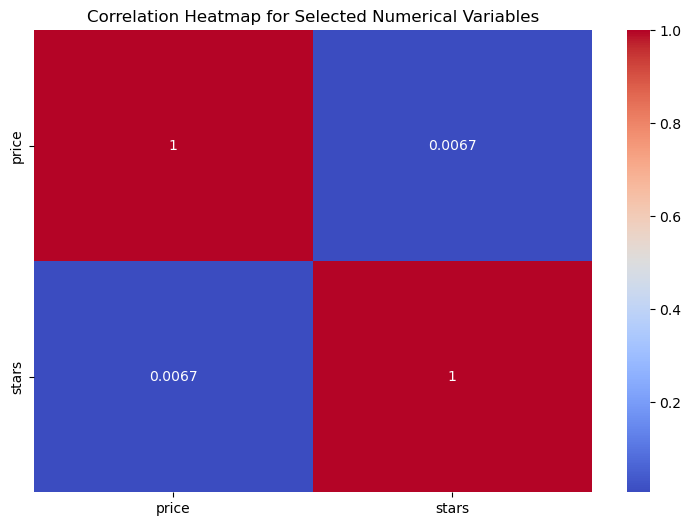

In [53]:
corr_mat = subset.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(9, 6))

# Drawing the heatmap for the numerical columns
sns.heatmap(corr_mat, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

When I run the correlation test and create a correlation matrix on the data that only contains star ratings, we see that the correlation between the two actually drops to be about 5% of what it was and is now positive, for a tiny 0.0067 correlation. Even if this correlation was significant, it would still mean that there is next to no relationship between the two. This actually explains why the scatterplot above *seems* to be trending upward - because the original correlation calculation didn't apply to that scatterplot, and the correlation that applies is this one. This means that the scatterplot wasn't deceptive, I was just comparing it to an incorrect correlation statistic. 

In [ ]:
# reference
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df['SalePrice'], line='s');

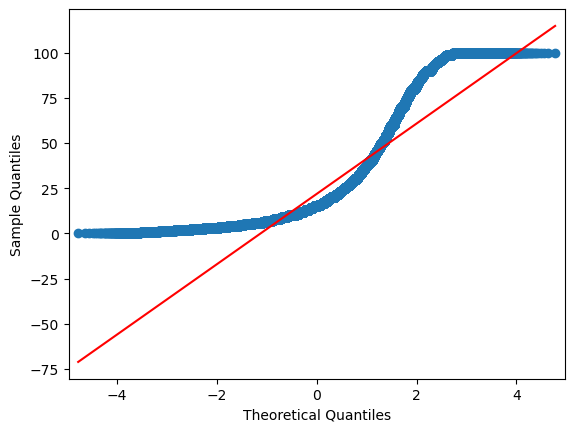

In [55]:
import statsmodels.api as sm

# Generate a Q-Q plot to price to see if prices are normally distributed
sm.qqplot(df_only_stars['price'], line='s');

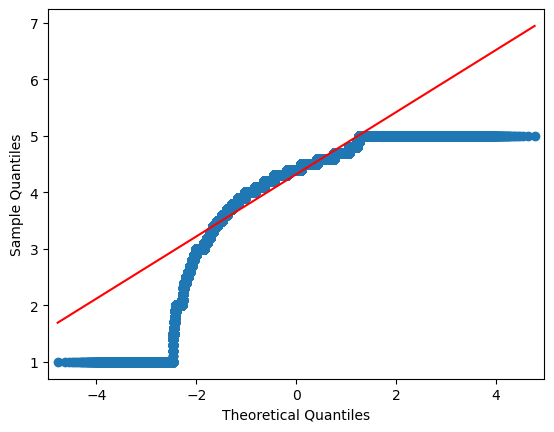

In [56]:
# Generate a Q-Q plot to stars to see if prices are normally distributed
sm.qqplot(df_only_stars['stars'], line='s');

Neither of the Q-Q plots for these variables demonstrate *any* kind of normality at all. Both tails in the price data indicate skewing on either side, despite my removal of outliers, and even the center doesn't follow the normal distribution line. The stars data is even worse, but it makes sense - there's a natural floor and ceiling on star ratings, 1 and 5, respectively. However, those ratings are not distributed evenly at all. There's a major skew in both for overwhelmingly positive or negative ratings. The center of the curve, though, does seem to follow a fairly normal distribution, suggesting that reviews that are between, maybe, 2.5 stars and 4.9 stars are fairly evenly distributed. 